In [4]:
import pandas as pd
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
import seaborn as sns
# = sns.load_dataset('tips')


In [5]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

In [6]:
# Display first 5 observations
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
SR,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [10]:
a = df.Attack
b = df.Defense

#a = df['A']

C:\Users\VJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


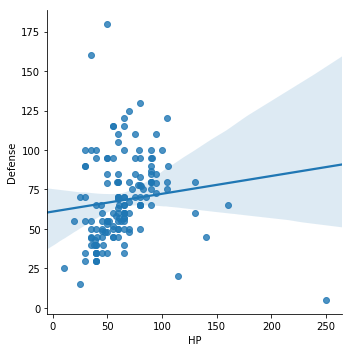

In [8]:
# Recommended way
sns.lmplot(x= 'HP', y='Defense', data=df)
 
# Alternative way
#sns.lmplot(x=df.Attack, y=df.Defense,data = df)

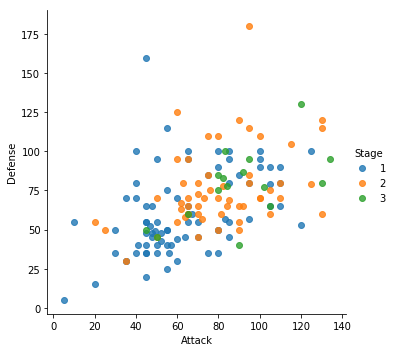

In [13]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage #third dimension of information using color

plt.savefig('temp.pdf',format = 'pdf')


(0, 141.24042280109302)

<Figure size 1440x432 with 0 Axes>

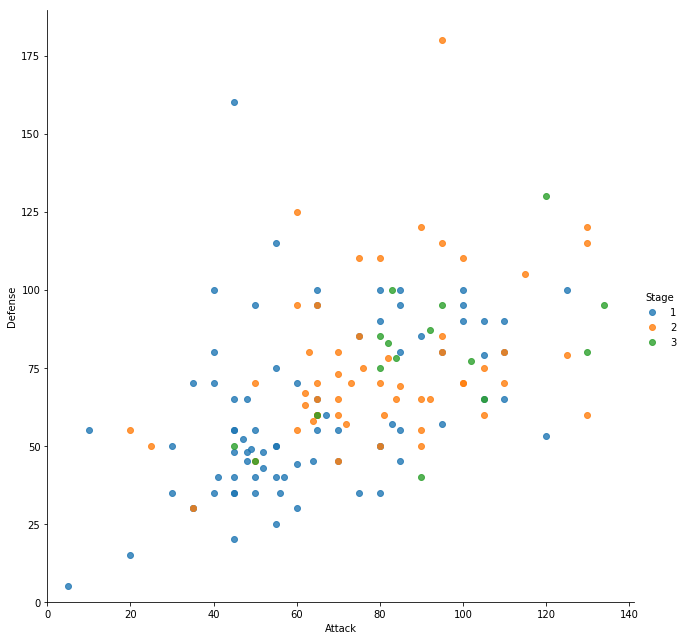

In [14]:
# Plot using Seaborn
plt.figure(figsize=(20,6))
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage',height=9)

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# The role of Pandas

In [ ]:
min(df['Total'])

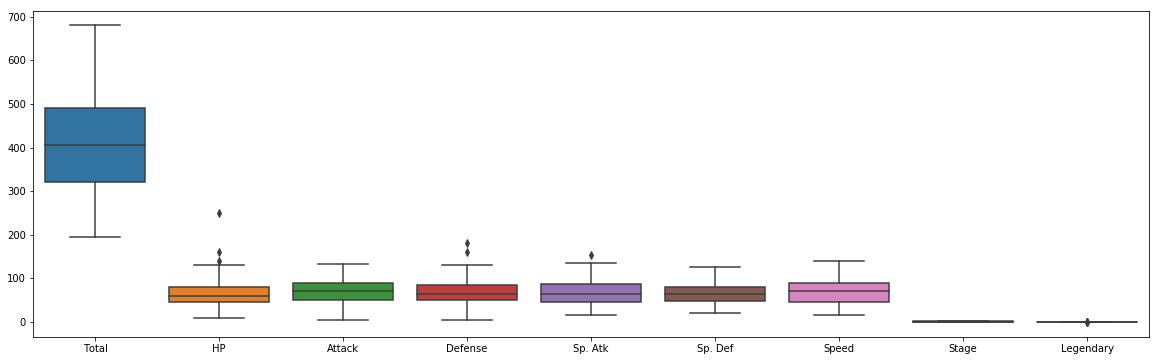

In [15]:
plt.figure(figsize=(20,6))
# Boxplot
#plt.figure(figsize=(20,6))
sns.boxplot(data = df)

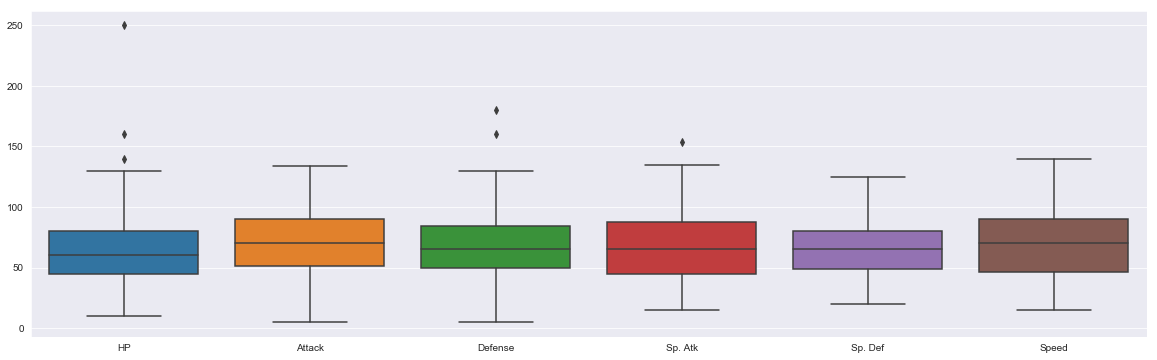

In [18]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
# New boxplot using stats_df
plt.figure(figsize=(20,6))
sns.set_style('darkgrid') #darkgrid  whitegrid
sns.boxplot(data=stats_df)

# Seaborn themes

In [1]:
# Set theme
plt.figure(figsize=(20,6))
sns.set_style('whitegrid') #darkgrid  whitegrid
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

NameError: name 'plt' is not defined

# Color palettes

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [ ]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(20,6))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

In [ ]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

# Overlaying plots

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(20,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

# Putting it all together

In [ ]:
stats_df = df.copy()

df.tail(152)

In [ ]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.tail(10)

In [ ]:
print( stats_df.shape )
print( melted_df.shape )

In [ ]:
# Swarmplot with melted_df
plt.figure(figsize=(14,6))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

# Finally, let's make a few final tweaks for a more readable chart:

    Enlarge the plot.
    Separate points by hue using the argument split=True .
    Use our custom Pokemon color palette.
    Adjust the y-axis limits to end at 0.
    Place the legend to the right.


In [ ]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn

In [ ]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

In [ ]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

In [ ]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

In [ ]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

In [ ]:

# Density Plot
sns.kdeplot(df.Attack, df.Defense)

## Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
plt.savefig('temp.pdf',format = 'pdf')